In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
result_df_test = pd.read_excel('./result_df_test_2.xls')
image_info_sorce = pd.read_csv('./image_info_sorce_hist_test_2.csv',index_col=0)

In [3]:
result_df_test.shape

(289, 41)

In [4]:
image_info_sorce.shape

(236, 41)

In [5]:
temp = image_info_sorce[['image_id','model_run_datetime','score']]
temp['model_run_datetime'] = pd.to_datetime(temp['model_run_datetime']).dt.date
result_df_test['model_run_datetime'] = pd.to_datetime(result_df_test['model_run_datetime']).dt.date
result = pd.merge(result_df_test,temp,on=['image_id','model_run_datetime'],how='inner')

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
result.shape

(236, 42)

In [7]:
result.sort_values('score',ascending=False)

,image_id,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,...,dislike,follow,message_action,report,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,media_id,data_win,score
205,18936,25486.89,11,740,1014.0,6,0.0149,34.441743,2316.990000,4,...,0,0,0,0,0.0730,12736.0,2019-12-31,10,3,739
175,18936,32942.87,12,939,1044.0,8,0.0128,35.082929,2745.239167,5,...,0,0,0,0,0.0699,28332.0,2019-12-30,10,3,737
77,19218,7227.57,2,246,616.0,4,0.0081,29.380366,3613.785000,2,...,0,0,0,0,0.0724,3766.0,2019-12-26,10,3,728
146,18936,39947.92,14,1190,1354.0,11,0.0118,33.569681,2853.422857,7,...,0,0,0,0,0.0615,29988.0,2019-12-29,10,3,727
96,19218,5749.97,2,204,616.0,3,0.0098,28.186127,2874.985000,2,...,0,0,0,0,0.0725,14684.0,2019-12-27,10,3,725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,19139,1455.80,0,8,0.0,1,0.0000,181.975000,0.000000,0,...,0,0,0,0,0.0000,0.0,2019-12-30,10,3,423
193,19339,2600.29,0,6,0.0,1,0.0000,433.381667,0.000000,0,...,0,0,0,0,0.0556,0.0,2019-12-30,10,3,420
226,19339,2448.86,0,2,0.0,1,0.0000,1224.430000,0.000000,0,...,0,0,0,0,0.0000,0.0,2019-12-31,10,3,410
225,19329,1057.24,0,3,0.0,1,0.0000,352.413333,0.000000,0,...,0,0,0,0,0.0000,0.0,2019-12-31,10,3,409


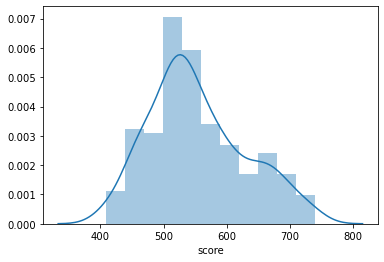

In [9]:
sns.distplot(result['score'])
plt.show()

In [10]:
result['score'].mean()

553.1228813559322

In [12]:
print('高分区ROI：',result[result['score']>=553]['create_role_30_pay_sum'].sum() / result[result['score']>=553]['image_run_date_amount'].sum())
print('低分区ROI：',result[result['score']<553]['create_role_30_pay_sum'].sum() / result[result['score']<553]['image_run_date_amount'].sum())

高分区ROI： 0.5598902115710839
低分区ROI： 0.2658685142626924


In [13]:
result['create_role_30_pay_sum'].sum() / result['image_run_date_amount'].sum()

0.4668517047615556

In [14]:
result[result['score']>=600]['image_run_date_amount'].sum() / result['image_run_date_amount'].sum()

0.5093095733797728

In [17]:
result[result['score']>=560]['image_run_date_amount'].sum() / result['image_run_date_amount'].sum()

0.648779751841457

In [16]:
print('高分区ROI：',result[result['score']>=560]['create_role_30_pay_sum'].sum() / result[result['score']>=560]['image_run_date_amount'].sum())
print('低分区ROI：',result[result['score']<560]['create_role_30_pay_sum'].sum() / result[result['score']<560]['image_run_date_amount'].sum())

高分区ROI： 0.5437044610484544
低分区ROI： 0.32488804402853627


In [18]:
result[result['score']>=560].shape[0]/result.shape[0]

0.3771186440677966

In [21]:
pd.to_datetime('2020-01-01 00:00:00',format='%Y-%m-%d ')

Timestamp('2020-01-01 00:00:00')

In [22]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)
    Convert argument to datetime.
    
    Parameters
    ----------
    arg : int, float, str, datetime, list, tuple, 1-d array, Series DataFrame/dict-like
        The object to convert to a datetime.
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then invalid parsing will raise an exception.
        - If 'coerce', then invalid parsing will be set as NaT.
        - If 'ignore', then invalid parsing will return the input.
    dayfirst : bool, default False
        Specify a date parse order if `arg` is str or its list-likes.
        If True, parses dates with the day first, eg 10/11/12 is parsed as
        2012-11-10.
        with day first (this is a known bug, based on dateutil behavior).
    yearfirst : bool, defaul